# Download and extract data

In [1]:
import os, wget, tarfile
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_dir = "/home/himalaya/Desktop/coding/projects/small-image-search-engine/"
raw_data_dir = os.path.join(base_dir, 'data/raw')
if(os.path.exists(os.path.join(raw_data_dir, "cifar-100-python.tar.gz")) == False):
    url = "https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"
    wget.download(url, raw_data_dir)

In [3]:
file_handler = tarfile.open(os.path.join(raw_data_dir, "cifar-100-python.tar.gz"))
file_handler.extractall(raw_data_dir)
file_handler.close()

# Load data

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dictionary = pickle.load(fo, encoding='bytes')
    return dictionary

In [5]:
train = unpickle(os.path.join(raw_data_dir, "cifar-100-python/train"))
test = unpickle(os.path.join(raw_data_dir, "cifar-100-python/test"))
meta = unpickle(os.path.join(raw_data_dir, "cifar-100-python/meta"))

# Exploratory data analysis

In [6]:
print(f"Train data type: {type(train)}")
print(f"Train data type: {type(test)}")
print(f"Meta data type: {type(meta)}")

Train data type: <class 'dict'>
Train data type: <class 'dict'>
Meta data type: <class 'dict'>


In [7]:
print(f"Train data keys: {train.keys()}")
print(f"Test data keys: {test.keys()}")
print(f"Meta data keys: {meta.keys()}")

Train data keys: dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
Test data keys: dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
Meta data keys: dict_keys([b'fine_label_names', b'coarse_label_names'])


In [8]:
# Cast train, test and meta dictionary values from list to numpy array
all_data = [train, test, meta]
for data in all_data:
    for key in data.keys():
        data[key] = np.array(data[key])

In [9]:
train[b'batch_label']

array(b'training batch 1 of 1', dtype='|S21')

In [10]:
random_idx = np.random.choice(np.arange(len(train[b'data'])), 2)
print(f"Some filenames: {train[b'filenames'][random_idx]}")
print(f"Batch label: {train[b'batch_label']}")
print(f"Some coarse labels: {train[b'coarse_labels'][random_idx]}")
print(f"Some fine labels: {train[b'fine_labels'][random_idx]}")
print(f"Some image data (in array form): {train[b'data'][random_idx]}")

Some filenames: [b'elephant_s_001684.png' b'adriatic_s_000627.png']
Batch label: b'training batch 1 of 1'
Some coarse labels: [11 10]
Some fine labels: [31 71]
Some image data (in array form): [[222 217 218 ... 227 228 227]
 [170 193 218 ...   7   7   8]]


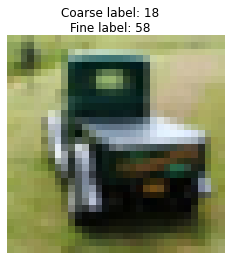

In [11]:
# Display a random image
random_idx = np.random.randint(0, len(train[b'data']))
plt.imshow(train[b'data'][random_idx].reshape(3,32,32).transpose(1,2,0))
plt.suptitle(f"Coarse label: {train[b'coarse_labels'][random_idx]}\nFine label: {train[b'fine_labels'][random_idx]}")
plt.axis("off")
plt.show()

In [12]:
idx_for_plotting = np.array([])
train_coarse_labels = train[b'coarse_labels']
for i, coarse_label in enumerate(set(train_coarse_labels)):
    coarse_class_img_idx = np.where(train_coarse_labels == coarse_label)[0]
    some_coarse_class_img_idx = np.random.choice(coarse_class_img_idx, size=8)
    idx_for_plotting = np.concatenate((idx_for_plotting, some_coarse_class_img_idx), axis=None)

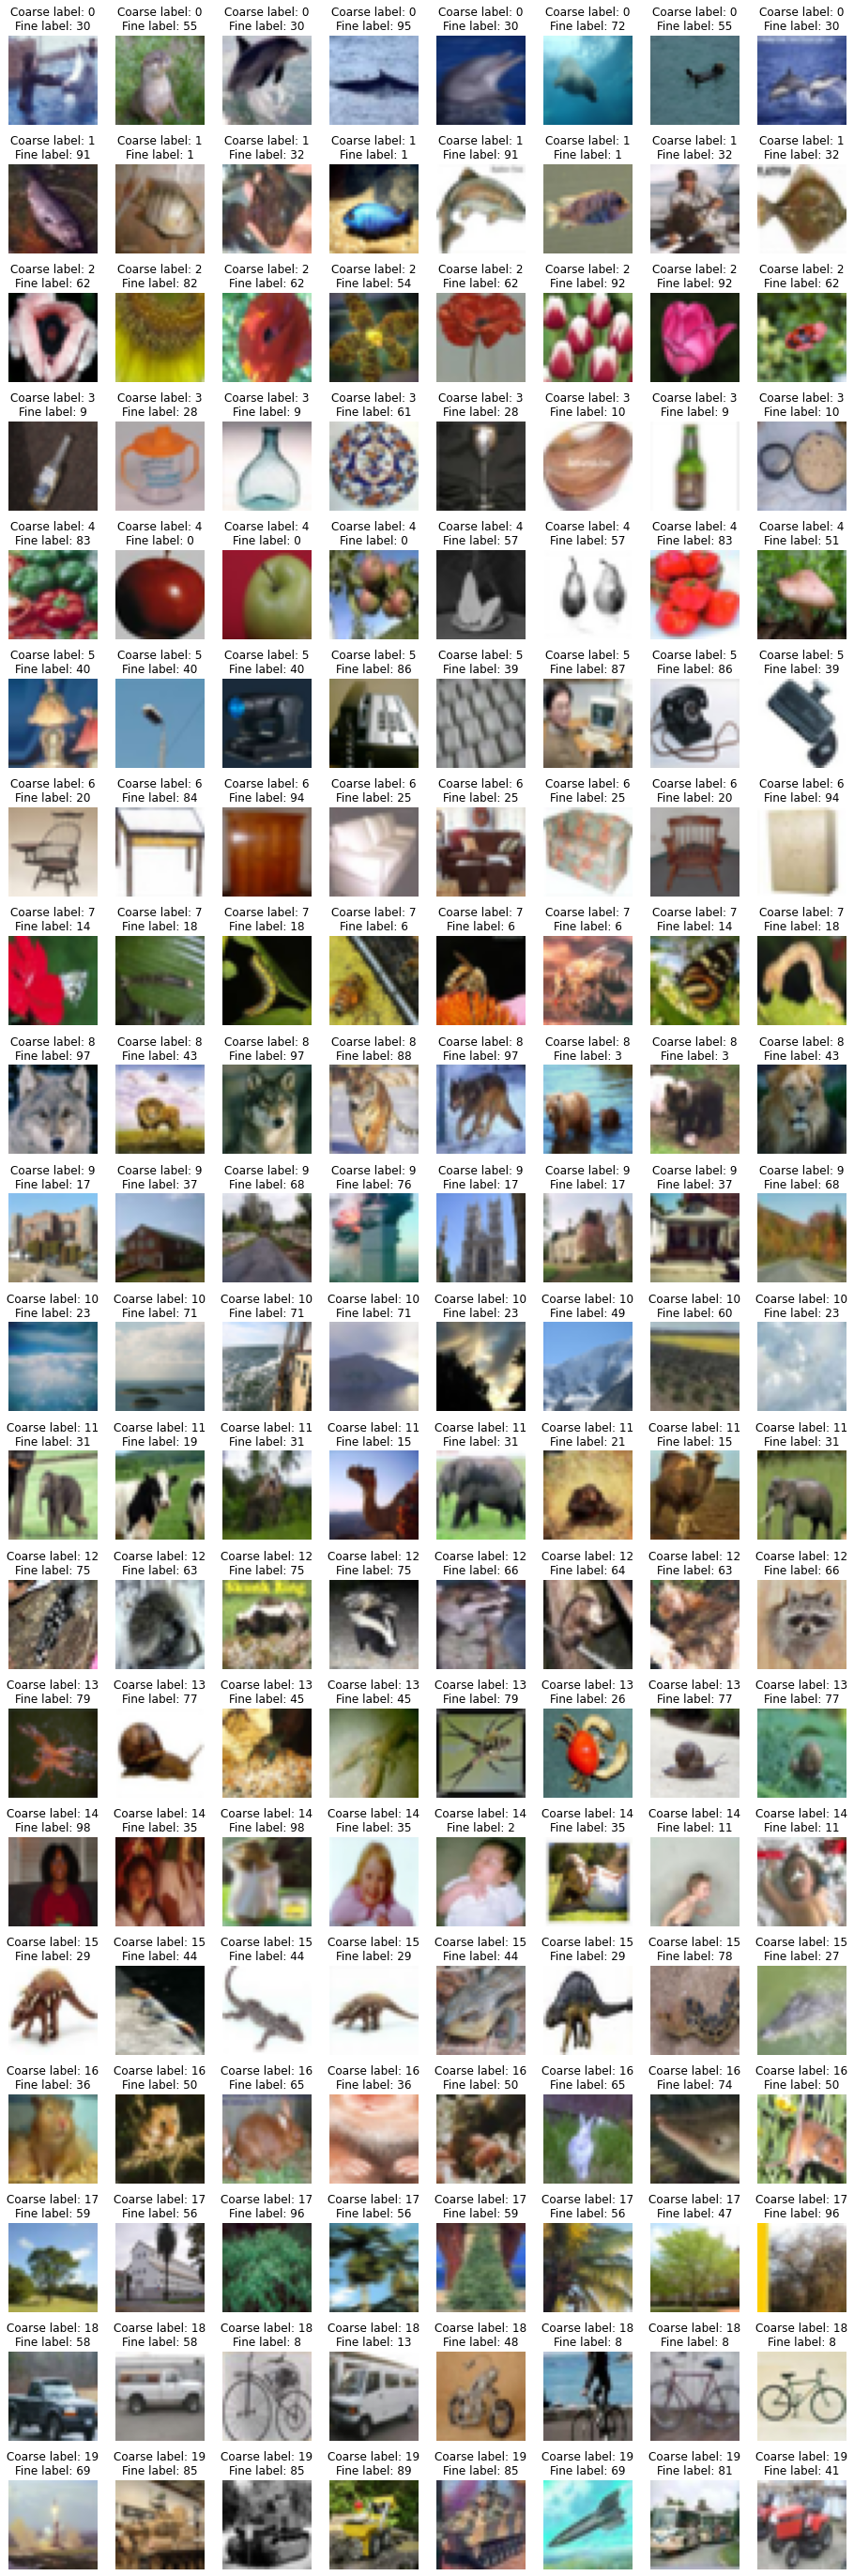

In [13]:
ncols = 8
nrows = 20

fig, ax = plt.subplots(nrows, ncols)
fig.set_size_inches(ncols*2, nrows*2.5)

idx_for_plotting = idx_for_plotting.astype(int)

idx = 0
for row in range(nrows):
    for col in range(ncols):
        ax[row, col].axis("off")
        ax[row, col].set_title(f"Coarse label: {train[b'coarse_labels'][idx_for_plotting[idx]]}\nFine label: {train[b'fine_labels'][idx_for_plotting[idx]]}")
        ax[row, col].imshow(train[b'data'][idx_for_plotting[idx]].reshape(3,32,32).transpose(1,2,0))
        idx += 1